#### Derivatives  
* The impact of parameter on the output
* The slope  
* Numerical derivative  

Randomly changing and looking for optimal weights and biases is not fruitful as we saw previously for one main reason,, the possible combinations of weights and biases is infinite and we need some smarter method besides pure luch to achieve any success. Each weight and bias may also influence the loss in different degrees, this depends on the parameters themselves as well as the current sample, which is an input to the first layer. These inputs are then multiplied by the weights, so input data affect the neuron´s output and affects the impact that the weights make on the loss. Same principle affect the biases and parameters in the next layer, taking previous layers output as inputs. Both parameters and sampls impact the output values. The function of how the weight and the bias impact the overall loss is not necessarily linear.To be able know *how* to adjust the weights and biases we first need to understand their impact on the loss.  
  
Even though we calculate the loss from the model´s output, not weights/biases, the latter directly impact the loss.  
  
In coming sections we will describe how this happens by explaining partial derivatives, gradients, gradient descent and backpropagation. We will calculate how much each singular weith and bias changes the loss value, how much impact it has on it, given a sample (as each sample produces a separate output and thus also a separate loss value).  
  
Our goal here is to decrease loss, we will do this using gradient descent. Gradient, on the other hand, is a result of the calculation of the partial derivatives and we will backpropagate it using the chain rule to update all of the weights and biases.  
  
To understand partial derivatives, we start first by derivatives, which is a special case of partial derivatives, they are calculated from functions taking single parameters.  
  
**The impact of a Parameter on the Output**  
  
Start with a simple function that takes x as an input:

In [1]:
def f(x):
    return 2*x

We also create some code to visualize the data and create an array of 5 inputs, calculate the function output for each of the input values and plot the result as lines between consecutive points. These points coordinates are inputs as x and function outputs as y:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2*x

x = np.array(range(5))
y = f(x)

print(x)
print(y)

[0 1 2 3 4]
[0 2 4 6 8]


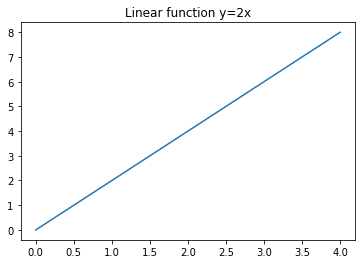

In [4]:
plt.plot(x,y)
plt.title("Linear function y=2x")
plt.show()

**The Slope**  
The above line looks like an outpu of the f(x) = 2x. How to define the impact x will have on y? We can say that y is double x. The impact of a linear function can be describes using algebra as the slope. The slope of a line is:  
  
Change in y / Change in x  
  
Also describe as delta y divided by delta x.  
  
Slope = delta y / delta x  
  
point1 = [0,0] (x,y)  
point2 = [1,2]  
  
delta x = 1-0 = 1  
delta y = 2-0 = 2  

Slope = 2/1 = 2

In [5]:
# calculate the slope using numpy

print((y[1]-y[0]) / (x[1]-x[0]))

2.0


The slope of 2 in this case is quite obvious, but what about a nonlinear function like:  
f(x) = 2x^2 

In [12]:
def f(x):
    return 2*x**2

This function creates a graph that is not a straing line. Can we measure the slope of this curve? Depending on which 2 points we choose to use, we will measure varying slopes.

In [7]:
# Calculate function outputs for new function
y = f(x)

print(x)
print(y)

[0 1 2 3 4]
[ 0  2  8 18 32]


In [8]:
# point 1
print((y[1]-y[0]) / (x[1]-x[0]))

2.0


In [9]:
# point 2
print((y[3]-y[2]) / (x[3]-x[2]))

10.0


How can we measure the impact that x has on y in this nonlinear function? Calculus propose we measure the slope of **the tangent line** at x (for a specific input value to the function),giving us the **instantenous slope** (slope in that point), which is the **derivative**. The tangent line is created by drawing a line between two points that are "infinitely close" on a curve, but the curve has to be differentiable at the derivationpoint.  
  
Since this is a curve, there is no single slope. The slope depends on where we measure it. As an example we can approximate a derivative of the function at x by using this point and another one also taken at x, but with a very small delta added to it, let´s say 0.0001. This is a common choice since it does not introduce too large error or cause the whole expression to be numerically unstable.  

In [13]:
p2_delta = 0.0001

x1 = 1
x2 = x1 + p2_delta  # add a delta

y1 = f(x1) # result at the derivative point
y2 = f(x2) # result at the other, close point

approximate_derivative = (y2-y1)/(x2-x1)
print(approximate_derivative)

4.0001999999987845


This result is very close to the derivative of 2x^2 at x=1 which is 4. The difference comes from the method used to compute the tangent. We chose a small enough delta to approximate the derivative as accurately as possible while large enough to prevent a rounding error. Our delta cannot surpass the limitations of Python´s floating-point precision (cant be too small as it might be rounded to 0). Our solution here then has a small visible error but on the other hand it remains numerically stable.

**The Numberical Derivative**  
tbd... JATKA TÄSTÄ

In [ ]:
# JATKA TÄSTÄ

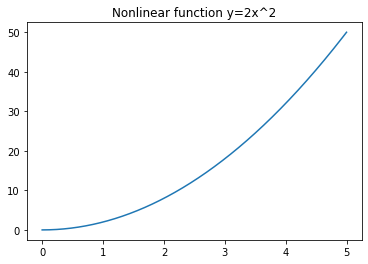

In [17]:
import matplotlib.pyplot as pl
import numpy as np

def f(x):
    return 2*x**2

# np.arange(start, stop, step) to give a smoother line
x = np.arange(0, 5, 0.001)
y = f(x)

plt.title("Nonlinear function y=2x^2")
plt.plot(x,y)
plt.show()